In [1]:
#first import all useful labrary in this project 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
#check 
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
#Splitting the data and Target
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission   
0    2014           5.59       27000          0            0             0  \
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
#Splitting Training and Test data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)
x_data = x_train 
x_train, x_unl, y_train, y_unl = train_test_split(x_train, y_train, test_size=0.7, random_state=42)

In [18]:
#check size of each data 
print("shape of train data :-", x_train.shape, y_train.shape )
print("shape of test data:- ", x_test.shape, y_test.shape )
print("shape of unlabel data:- ", x_unl.shape, y_unl.shape )

shape of train data :- (63, 7) (63,)
shape of test data:-  (91, 7) (91,)
shape of unlabel data:-  (147, 7) (147,)


In [19]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [21]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [22]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9388371092851354


In [ ]:
#Visualize the actual prices and Predicted prices

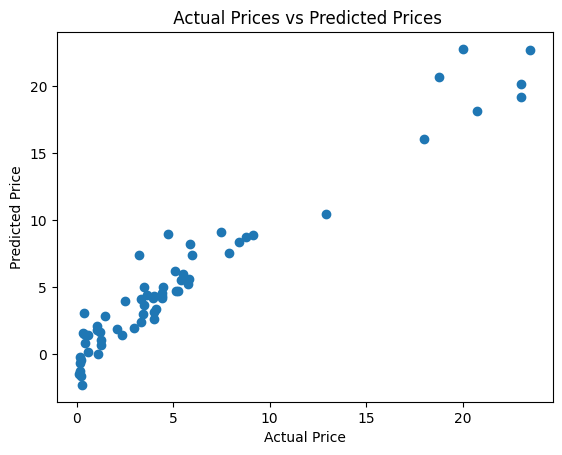

In [23]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [28]:
#train data 
training_data_prediction

array([ 2.01185230e+01,  1.81065948e+01,  9.40078291e-03,  9.11243950e+00,
        1.81354851e+00,  4.99041343e+00,  7.43069906e+00,  2.26747675e+01,
        1.91468058e+01, -6.81748904e-01,  1.95066177e+00,  8.87526883e+00,
        4.37283473e+00,  3.96590190e+00,  2.86826597e+00,  2.11291363e+00,
        1.42142383e+00,  4.67590400e+00,  5.00352694e+00,  5.54357704e+00,
        8.71075082e+00,  2.96151193e+00,  4.41266274e+00,  8.35861506e+00,
       -2.48059647e-01, -1.62106282e+00,  5.56839538e+00, -4.63826271e-01,
        3.04280698e+00,  4.73394822e+00,  4.16430317e+00,  3.12603100e+00,
        1.94280617e-01,  2.38869085e+00,  6.00391892e+00,  6.90754831e-01,
        8.95020827e+00,  4.54119918e+00,  8.23095172e+00,  4.32645553e+00,
       -2.29876796e+00,  1.43639235e+00,  5.20526420e+00,  6.20614118e+00,
        2.63169684e+00, -1.49489399e+00,  3.38303399e+00,  4.16427393e+00,
        4.08836657e+00,  3.63159406e+00,  2.27698860e+01,  1.61390117e+00,
        1.90268357e+00,  

In [31]:
#predict unlabel data 
x_pred = lin_reg_model.predict(x_unl)

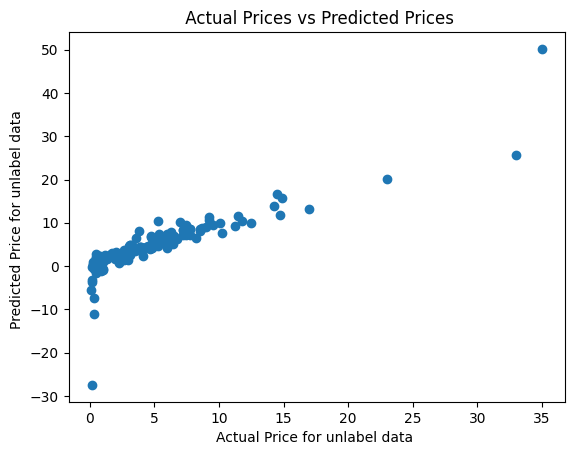

In [34]:
#Visulazation 
plt.scatter(y_unl, x_pred)
plt.xlabel("Actual Price for unlabel data ")
plt.ylabel("Predicted Price for unlabel data ")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [47]:
#add total data and label data 
print(x_data.shape)
y_total_label = np.concatenate((y_unl, x_pred ), axis=0)
y_total = y_total_label[:210]
y_total.shape

(210, 7)


(210,)

In [48]:
#create new model 
model_1 = LinearRegression()
model_1.fit(x_data, y_total)

LinearRegression()

In [49]:
## prediction on Test data
test_data_prediction = model_1.predict(X_test)

In [50]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.10931776332629395


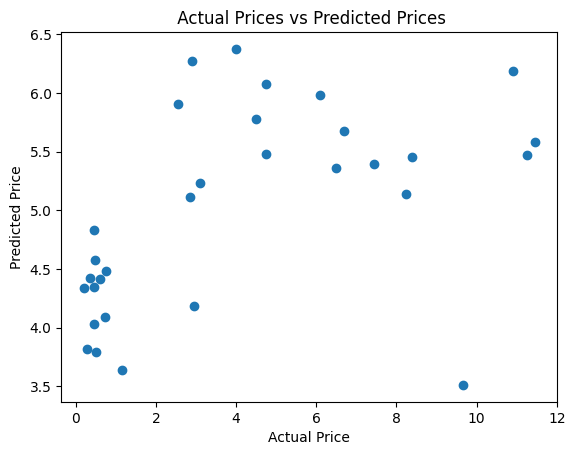

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [52]:
# Lasso Regression

In [53]:
# loading the linear regression model
lass_reg_model = Lasso()

In [54]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [55]:
#Model Evaluation

In [56]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [57]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6182310801077893


In [58]:
#Visualize the actual prices and Predicted prices

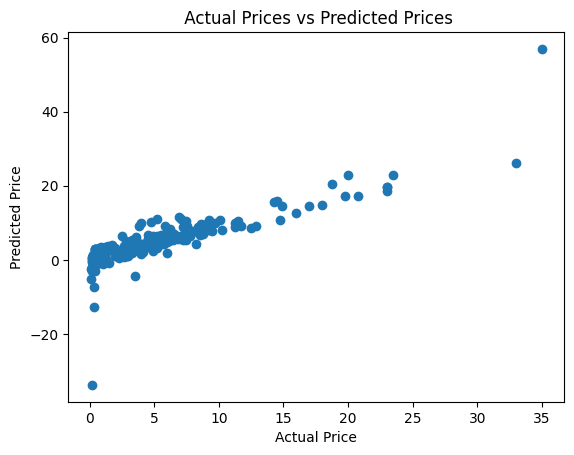

In [59]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [60]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [61]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7992331946532816


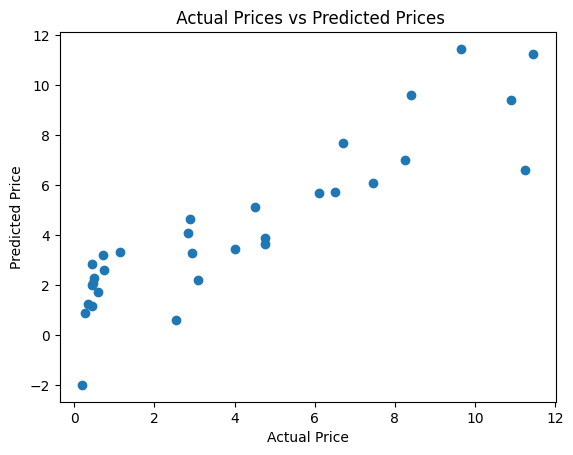

In [62]:
#visulazation of graph 
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()